# EuroMillion Game

In [1]:
import pandas as pd
from functions import *

In [2]:
date_list, balls = euromillions_web_scraping()
df = pd.DataFrame(list(zip(date_list, balls)), 
               columns =['date', 'balls'])

/Users/miki/Projects/Web Scraping/functions.py:10: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 10 of the file /Users/miki/Projects/Web Scraping/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(webpage_response.content)


In [3]:
df.head()

,date,balls
0,Tuesday15th December 2020,"[9, 13, 21, 29, 35, 1, 2]"
1,Friday11th December 2020,"[6, 9, 13, 24, 41, 3, 12]"
2,Tuesday8th December 2020,"[1, 4, 21, 24, 46, 2, 12]"
3,Friday4th December 2020,"[14, 20, 27, 34, 38, 1, 11]"
4,Tuesday1st December 2020,"[14, 20, 29, 47, 49, 4, 12]"


In [4]:
df['new_ball'] = df['balls'].apply(lambda x: x[:-2])
df['new_lucky_star'] = df['balls'].apply(lambda x: x[-2:])

In [5]:
def count_even_numbers(lst):
    even = [n for n in lst if n%2 == 0]
    return len(even)
df['even_count'] = df['new_ball'].apply(count_even_numbers)

In [6]:
import math
import numpy as np
# Prime number can only be divided by itself or by 1
def is_prime(n):
    if (n % 2 == 0 and n > 2) or n <=1: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))


func = np.vectorize(is_prime)
df['prime'] = df['new_ball'].apply(func)

In [7]:
df['prime_count'] = df['prime'].apply(lambda x: sum(x)) 
df.drop(columns = ['prime'], axis=1, inplace = True)
df.head()

,date,balls,new_ball,new_lucky_star,even_count,prime_count
0,Tuesday15th December 2020,"[9, 13, 21, 29, 35, 1, 2]","[9, 13, 21, 29, 35]","[1, 2]",0,2
1,Friday11th December 2020,"[6, 9, 13, 24, 41, 3, 12]","[6, 9, 13, 24, 41]","[3, 12]",2,2
2,Tuesday8th December 2020,"[1, 4, 21, 24, 46, 2, 12]","[1, 4, 21, 24, 46]","[2, 12]",3,0
3,Friday4th December 2020,"[14, 20, 27, 34, 38, 1, 11]","[14, 20, 27, 34, 38]","[1, 11]",4,0
4,Tuesday1st December 2020,"[14, 20, 29, 47, 49, 4, 12]","[14, 20, 29, 47, 49]","[4, 12]",2,2


In [8]:
def lucky_star_overlap_with_balls(df):
    lucky_star = df[0]
    
    balls = df[1]
    count = 0
    for item in lucky_star:
        if item in balls:
            count +=1
    return count
df['lucky_star_in'] = df[['new_lucky_star', 'new_ball']].apply(lucky_star_overlap_with_balls, axis = 1)

In [9]:
import datetime
from dateutil.parser import parse
# Transformation of date format
df['adj_date'] = df['date'].apply(parse)

In [10]:
"""
1-10 (3)
11-20 (2)
21-30 (1)
31-40 (0)
41-50 (0)
"""
def grouping(lst, start, end):
    group = [n for n in lst if n in range(start, end)]
    return len(group)
df['1-9'] = df['new_ball'].apply(grouping, args=(1,10))        
df['10-19'] = df['new_ball'].apply(grouping, args=(10,20))
df['20-29'] = df['new_ball'].apply(grouping, args=(20,30))
df['30-39'] = df['new_ball'].apply(grouping, args=(30,40))
df['40-50'] = df['new_ball'].apply(grouping, args=(40,51))
df.head()

,date,balls,new_ball,new_lucky_star,even_count,prime_count,lucky_star_in,adj_date,1-9,10-19,20-29,30-39,40-50
0,Tuesday15th December 2020,"[9, 13, 21, 29, 35, 1, 2]","[9, 13, 21, 29, 35]","[1, 2]",0,2,0,2020-12-15,1,1,2,1,0
1,Friday11th December 2020,"[6, 9, 13, 24, 41, 3, 12]","[6, 9, 13, 24, 41]","[3, 12]",2,2,0,2020-12-11,2,1,1,0,1
2,Tuesday8th December 2020,"[1, 4, 21, 24, 46, 2, 12]","[1, 4, 21, 24, 46]","[2, 12]",3,0,0,2020-12-08,2,0,2,0,1
3,Friday4th December 2020,"[14, 20, 27, 34, 38, 1, 11]","[14, 20, 27, 34, 38]","[1, 11]",4,0,0,2020-12-04,0,1,2,2,0
4,Tuesday1st December 2020,"[14, 20, 29, 47, 49, 4, 12]","[14, 20, 29, 47, 49]","[4, 12]",2,2,0,2020-12-01,0,1,2,0,2


(array([0.01632653, 0.01428571, 0.0122449 , 0.0244898 , 0.03469388,
        0.01836735, 0.01632653, 0.02040816, 0.0244898 , 0.02244898,
        0.02857143, 0.0244898 , 0.0122449 , 0.02653061, 0.03469388,
        0.02653061, 0.02244898, 0.01020408, 0.02857143, 0.02857143,
        0.02653061, 0.0122449 , 0.0244898 , 0.02244898, 0.01836735,
        0.01020408, 0.02653061, 0.02244898, 0.02040816, 0.0244898 ,
        0.00816327, 0.0244898 , 0.01836735, 0.02040816, 0.01428571,
        0.01428571, 0.0244898 , 0.02653061, 0.02040816, 0.01632653,
        0.0244898 , 0.02040816, 0.01836735, 0.01632653, 0.02040816,
        0.02857143, 0.01428571, 0.00408163, 0.0122449 , 0.01836735]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22

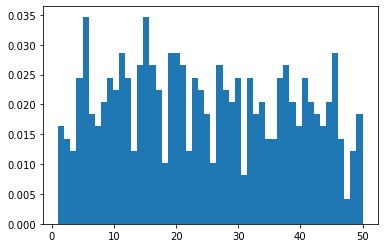

In [11]:
# Histogram with density
from matplotlib import pyplot as plt
import seaborn as sns
ball_list = df['new_ball'].to_list()
data = sum(ball_list,[])
plt.hist(data, 50, density = True) # 50 bins

[0.01035655]


(array([0.01632653, 0.01428571, 0.0122449 , 0.0244898 , 0.03469388,
        0.01836735, 0.01632653, 0.02040816, 0.0244898 , 0.02244898,
        0.02857143, 0.0244898 , 0.0122449 , 0.02653061, 0.03469388,
        0.02653061, 0.02244898, 0.01020408, 0.02857143, 0.02857143,
        0.02653061, 0.0122449 , 0.0244898 , 0.02244898, 0.01836735,
        0.01020408, 0.02653061, 0.02244898, 0.02040816, 0.0244898 ,
        0.00816327, 0.0244898 , 0.01836735, 0.02040816, 0.01428571,
        0.01428571, 0.0244898 , 0.02653061, 0.02040816, 0.01632653,
        0.0244898 , 0.02040816, 0.01836735, 0.01632653, 0.02040816,
        0.02857143, 0.01428571, 0.00408163, 0.0122449 , 0.01836735]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22

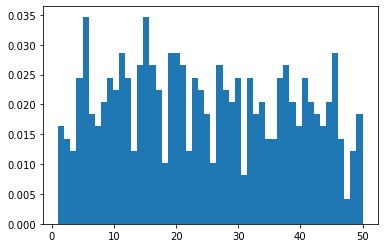

In [12]:
# Alternative to get probability density function
import scipy
kde = scipy.stats.gaussian_kde(data)
print(kde.pdf(1))
density, bins = np.histogram(data, bins = 50, density = True)
plt.hist(bins[:-1], bins, weights=density)

In [13]:
from collections import Counter
counts = Counter(data)
counts.values()
total = sum(counts.values())
sorted(counts.items(), key=lambda item: item[0])
# Empirical Probability
import collections
probability_mass = {k:v/total for k,v in counts.items()}
# sorted(probability_mass.items())
sorted_dict = {n: probability_mass[n] for n in sorted(probability_mass)}
sorted_dict

{1: 0.016,
 2: 0.014,
 3: 0.012,
 4: 0.024,
 5: 0.034,
 6: 0.018,
 7: 0.016,
 8: 0.02,
 9: 0.024,
 10: 0.022,
 11: 0.028,
 12: 0.024,
 13: 0.012,
 14: 0.026,
 15: 0.034,
 16: 0.026,
 17: 0.022,
 18: 0.01,
 19: 0.028,
 20: 0.028,
 21: 0.026,
 22: 0.012,
 23: 0.024,
 24: 0.022,
 25: 0.018,
 26: 0.01,
 27: 0.026,
 28: 0.022,
 29: 0.02,
 30: 0.024,
 31: 0.008,
 32: 0.024,
 33: 0.018,
 34: 0.02,
 35: 0.014,
 36: 0.014,
 37: 0.024,
 38: 0.026,
 39: 0.02,
 40: 0.016,
 41: 0.024,
 42: 0.02,
 43: 0.018,
 44: 0.016,
 45: 0.02,
 46: 0.028,
 47: 0.014,
 48: 0.004,
 49: 0.012,
 50: 0.018}

In [14]:
# print(counts.most_common(10))
# counts.most_common()[-10:]
lowest_prob_num = counts.most_common()[-1][0]
lowest_prob_num

48

In [15]:
total = 0
for k, v in sorted_dict.items():
    if k != lowest_prob_num:
        total += v
sorted_dict[lowest_prob_num] = 1 - total
# probability = result.values()
prob = np.array(list(sorted_dict.values()))

In [16]:
# new_ball = np.random.choice(np.arange(1,51), 5, p=prob, replace = False)
# new_ball

In [17]:
df.describe()

,even_count,prime_count,lucky_star_in,1-9,10-19,20-29,30-39,40-50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.440000,1.490000,0.170000,0.890000,1.160000,1.040000,0.960000,0.950000
std,1.037869,0.969171,0.403395,0.863339,0.800505,0.839913,0.851855,0.821123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000


In [18]:
# There are 15 prime numbers within 50 p(n= 1 get one prime numbers) = 15/50 = 0.3
print(5*0.3) # get 1.5 prime number ball(s), which is closer to the above statistics (2)

# The probability to get an odd number is the same as getting an even number
print(5*0.5) # get 2.5 even number balls, which is closer to the above statistics (3)

1.5
2.5


In [19]:
prob_lucky_star_distribution = pd.Series(df.lucky_star_in.value_counts()/df.lucky_star_in.value_counts().sum()).to_numpy()

In [20]:
df.lucky_star_in.value_counts().sum()

100

In [21]:
df.head()

,date,balls,new_ball,new_lucky_star,even_count,prime_count,lucky_star_in,adj_date,1-9,10-19,20-29,30-39,40-50
0,Tuesday15th December 2020,"[9, 13, 21, 29, 35, 1, 2]","[9, 13, 21, 29, 35]","[1, 2]",0,2,0,2020-12-15,1,1,2,1,0
1,Friday11th December 2020,"[6, 9, 13, 24, 41, 3, 12]","[6, 9, 13, 24, 41]","[3, 12]",2,2,0,2020-12-11,2,1,1,0,1
2,Tuesday8th December 2020,"[1, 4, 21, 24, 46, 2, 12]","[1, 4, 21, 24, 46]","[2, 12]",3,0,0,2020-12-08,2,0,2,0,1
3,Friday4th December 2020,"[14, 20, 27, 34, 38, 1, 11]","[14, 20, 27, 34, 38]","[1, 11]",4,0,0,2020-12-04,0,1,2,2,0
4,Tuesday1st December 2020,"[14, 20, 29, 47, 49, 4, 12]","[14, 20, 29, 47, 49]","[4, 12]",2,2,0,2020-12-01,0,1,2,0,2


In [22]:
def same_last_digit(lst):
    new_lst = [str(n)[-1] for n in lst]
    if len(new_lst) == len(set(new_lst)):
        return False
    else:
        return True

In [23]:
df['same_last_digit'] = df['new_ball'].apply(same_last_digit)
df.same_last_digit.value_counts()

True     67
False    33
Name: same_last_digit, dtype: int64

In [24]:
66/99 # By observation, ~ 66.67% of the draws, at least 2 draw numbers having the same last digit

0.6666666666666666

In [25]:
# Pigeonhole Principle
q = (50/50) * (45/49) * (40/48) * (35/47) * (30/46) # Probability of having all the last digits being distinct
1-q # The probability is quite close to the observation

0.6283203383110876

In [26]:
# Same applies when we take all balls into account
df['all_balls_same_last_digit'] = df['balls'].apply(same_last_digit)
df.all_balls_same_last_digit.value_counts()

True     94
False     6
Name: all_balls_same_last_digit, dtype: int64

In [27]:
93/99

0.9393939393939394

In [28]:
# Pigeonhole Principle
q = (50/50) * (45/49) * (40/48) * (35/47) * (30/46) * (25/45) * (20/44) # Probability of having all the last digits being distinct
1-q # The probability is quite close to the observation

0.906141499573507

# Conclusion: When you buy lottery, you should choose numbers such that at least two of them have the same last digit!

In [29]:
# Get probability density for lucky star balls
lucky_ball_list = df['new_lucky_star'].to_list()
lucky_data = sum(lucky_ball_list,[])

In [30]:
lucky_counts = Counter(lucky_data)
lucky_counts.values()
total = sum(lucky_counts.values())

# Empirical Probability
lucky_probability_mass = {k:v/total for k,v in lucky_counts.items()}
# sorted(probability_mass.items())
lucky_sorted_dict = {n: lucky_probability_mass[n] for n in sorted(lucky_probability_mass)}
lucky_sorted_dict

{1: 0.08,
 2: 0.1,
 3: 0.09,
 4: 0.085,
 5: 0.07,
 6: 0.105,
 7: 0.08,
 8: 0.085,
 9: 0.08,
 10: 0.065,
 11: 0.07,
 12: 0.09}

In [31]:
lucky_lowest_prob_num = lucky_counts.most_common()[-1][0]
lucky_lowest_prob_num

10

In [32]:
total = 0
for k, v in lucky_sorted_dict.items():
    if k != lucky_lowest_prob_num:
        total += v
lucky_sorted_dict[lucky_lowest_prob_num] = 1 - total

prob2 = np.array(list(lucky_sorted_dict.values()))

In [33]:
# new_lucky_ball = np.random.choice(np.arange(1,13), 2, p=prob2, replace = False)
# new_lucky_ball

In [34]:
def count_prime_number(lst):
    prime_list = [n for n in lst if is_prime(n)]
    return len(prime_list)

Based on the above observation, we can create our model now
#1. at least two of them have the same last digit
#2. Most of the time, no or at most one overlapping lucky star number with other balls
#3. Even/ Prime number : 0 (min) & 4(max)

In [35]:
lucky_star = np.random.choice(np.arange(0,3), 1, p=prob_lucky_star_distribution, replace = False)
repeat = int(lucky_star)
print(repeat)
new_ball = np.random.choice(np.arange(1,51), 5, p=prob, replace = False)
new_lucky_ball = np.random.choice(np.arange(1,13), 2, p=prob2, replace = False)
total_balls = [new_lucky_ball, new_ball]
while not(same_last_digit(new_ball)) or (count_even_numbers(new_ball) > 3) or (count_prime_number(new_ball) > 3) or (lucky_star_overlap_with_balls(total_balls) != repeat):
    new_ball = np.random.choice(np.arange(1,51), 5, p=prob, replace = False)
    new_lucky_ball = np.random.choice(np.arange(1,13), 2, p=prob2, replace = False)
    total_balls = [new_lucky_ball, new_ball]

0


In [36]:
print(sorted(new_ball))
print(sorted(new_lucky_ball))
print(total_balls)
print(lucky_star_overlap_with_balls(total_balls))

[9, 23, 37, 43, 50]
[4, 11]
[array([11,  4]), array([37, 23, 43,  9, 50])]
0


In [37]:
# Auto-generated random numbers
auto_gen_balls = np.random.choice(np.arange(1,51), 5, p=prob, replace = False)
auto_gen_lucky_balls = np.random.choice(np.arange(1,13), 2, p=prob2, replace = False)
print(auto_gen_balls)
print(auto_gen_lucky_balls)

[20 18 27 42 40]
[11  4]


In [38]:
today_date_list, today_draw_balls = euromillions_web_scraping()
print(today_date_list[0], today_draw_balls[0])

Tuesday15th December 2020 [9, 13, 21, 29, 35, 1, 2]


/Users/miki/Projects/Web Scraping/functions.py:10: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 10 of the file /Users/miki/Projects/Web Scraping/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(webpage_response.content)


In [39]:
today_draw_balls[0][:-2]
today_draw_balls[0][-2:]

[1, 2]

In [40]:
lucky_draw = today_draw_balls[0][:-2]
lucky_star_draw = today_draw_balls[0][-2:]

def euromillions_checker(draw_list, draw_star_list, guess_list, guess_star_list):
    ball_count = 0
    lucky_count = 0
    for n in guess_list:
        if n in draw_list:
            ball_count += 1
    for m in guess_star_list:
        if m in draw_star_list:
            lucky_count += 1
    return ball_count, lucky_count

In [41]:
base = 7 # total number of drawn balls 
print(today_date_list[0])
print('Lucky Draw result:')
print(lucky_draw, lucky_star_draw, sep = '\n')
print('Predicted Model: ')
print(sorted(new_ball), sorted(new_lucky_ball), sep = '\n')
check1 = euromillions_checker(lucky_draw, lucky_star_draw, new_ball, new_lucky_ball)
print(check1)
print(sum(check1)/base)
print('Random Walk Model: ')
print(sorted(auto_gen_balls), sorted(auto_gen_lucky_balls), sep = '\n')
check2 = euromillions_checker(lucky_draw, lucky_star_draw, auto_gen_balls, auto_gen_lucky_balls)
print(check2)
print(sum(check2)/base)

Tuesday15th December 2020
Lucky Draw result:
[9, 13, 21, 29, 35]
[1, 2]
Predicted Model: 
[9, 23, 37, 43, 50]
[4, 11]
(1, 0)
0.14285714285714285
Random Walk Model: 
[18, 20, 27, 40, 42]
[4, 11]
(0, 0)
0.0
